In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, ElasticNet, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)


In [2]:
# Download and import the fuel efficiency dataset

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [3]:
# Copy and view the dataset

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [4]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [5]:
dataset = dataset.dropna()
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [6]:
# Let's see the statistics and differences of each feature:
dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.445918,7.805007
Cylinders,5.471939,1.705783
Displacement,194.411990,104.644004
Horsepower,104.469388,38.491160
Weight,2977.584184,849.402560
Acceleration,15.541327,2.758864
Model Year,75.979592,3.683737
Origin,1.576531,0.805518


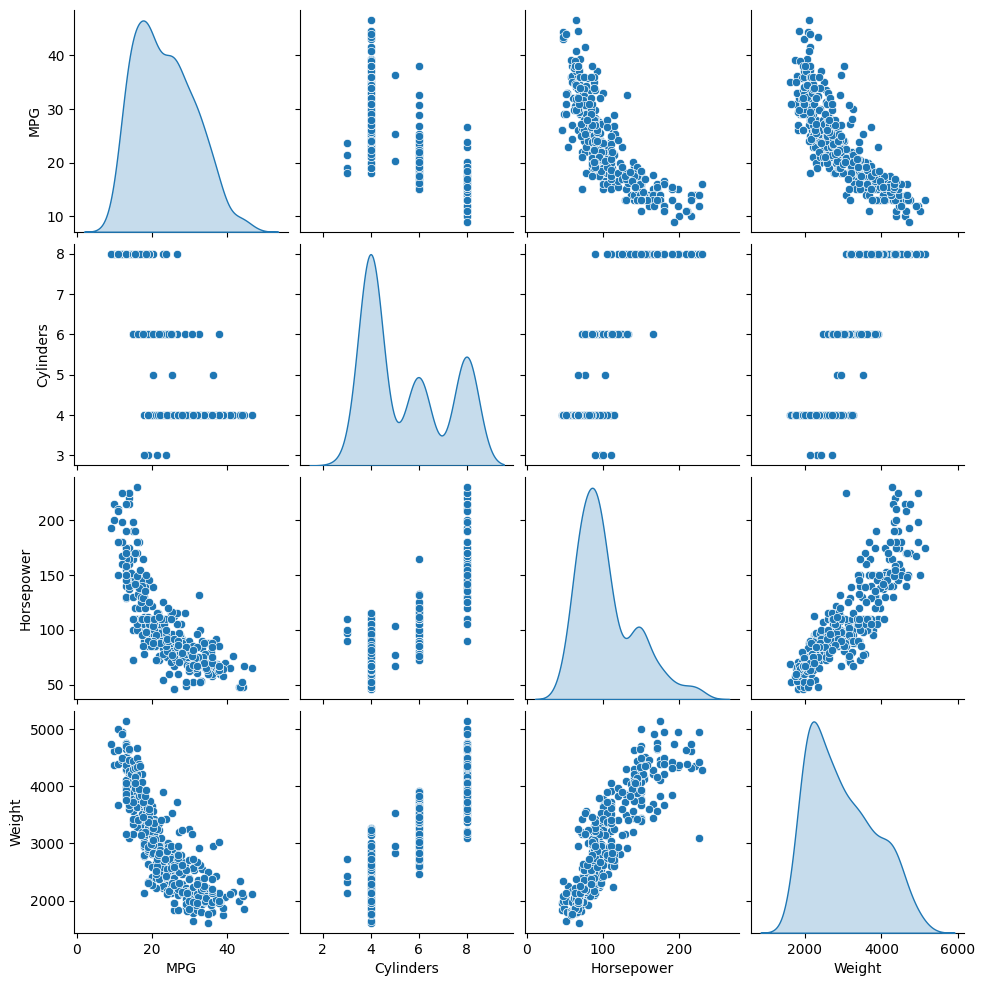

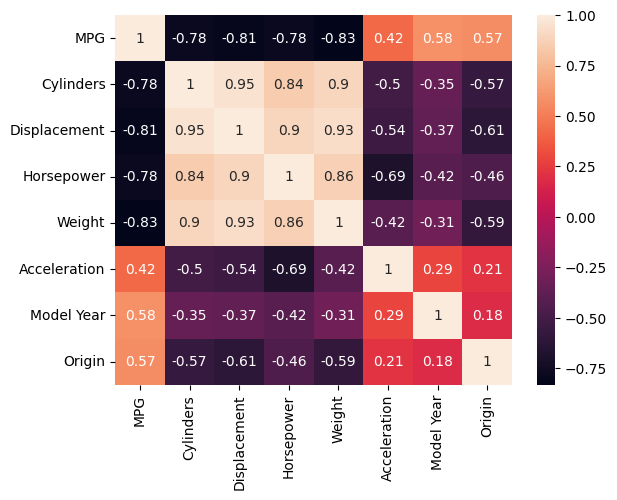

In [7]:
# Inspecting the generated data
sns.pairplot(dataset[['MPG', 'Cylinders', 'Horsepower', 'Weight']], diag_kind='kde')
plt.show()

sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [8]:
dataset_dummies = pd.get_dummies(dataset).astype('float32')
dataset_dummies['Origin'] = dataset_dummies['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset_dummies = pd.get_dummies(dataset_dummies, columns=['Origin'], prefix='', prefix_sep='')
dataset_dummies.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,False,False,True
394,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,True,False,False
395,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,False,False,True
396,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,False,False,True
397,31.0,4.0,119.0,82.0,2720.0,19.4,82.0,False,False,True


In [9]:
# Separating  target variable from the features of the dataset
# The MPG column represents "Miles per Gallon", so if we want to predict the efficiency,
# this is the variable that we want to look at.

X = dataset_dummies.drop("MPG", axis = 1).values
y = dataset_dummies["MPG"].values

In [178]:
# Splitting the dataset into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

x_train=np.arange(0,len(X_train),1)
y_test = y_test.reshape(-1, 1)

print(type(X_train), type(y_train))
#print(X_train)
#print(X_train.shape)
#print(y_train)
#print(y_train.shape)
#print(X_test)
#print(X_test.shape)
#print(y_test)
#print(y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


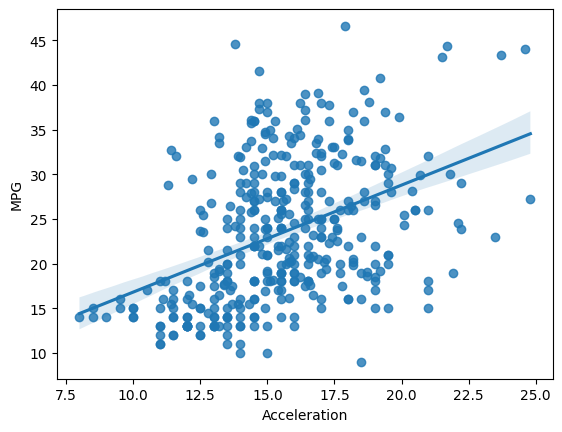

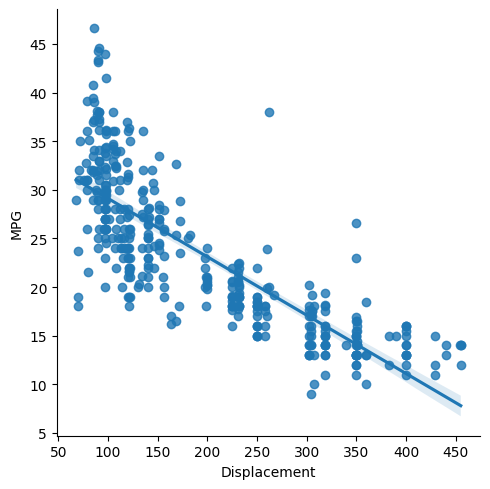

In [151]:
sns.regplot(x="Acceleration", y="MPG", data=dataset_dummies)
plt.show()

sns.lmplot(x="Displacement", y="MPG", data=dataset_dummies)
plt.show()

Fitting Lasso regression model: HP to MPG

In [12]:
X_horsepower = X[:, 3]
print(y.shape, X_horsepower.shape)

X_horsepower = X_horsepower.reshape(-1, 1)
print(X_horsepower.shape)

(392,) (392,)
(392, 1)


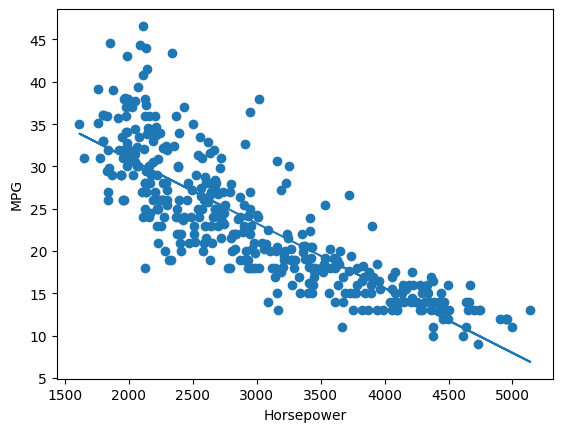

In [13]:
hp_lasso = Lasso()
hp_lasso.fit(X_horsepower, y)
hp_lasso_pred = hp_lasso.predict(X_horsepower)

plt.scatter(X_horsepower, y)
plt.plot(X_horsepower, hp_lasso_pred)
plt.ylabel("MPG")
plt.xlabel("Horsepower")
plt.show()

Fitting Regression Models using all feature variables

In [14]:
# Instantiation of Model types

lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor()
elasticnet_reg = ElasticNet()
ridge_reg = Ridge()
bayes_ridge_reg = BayesianRidge()

In [15]:
# Fitting models

lin_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)
elasticnet_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
bayes_ridge_reg.fit(X_train, y_train)

lin_predictions = lin_reg.predict(X_test)
tree_predictions = tree_reg.predict(X_test)
elasticnet_predictions = elasticnet_reg.predict(X_test)
ridge_predictions = ridge_reg.predict(X_test)
bayes_ridge_predictions = bayes_ridge_reg.predict(X_test)

# Inspect Prediction Vectors

# print(tree_predictions)
# print(tree_predictions.shape)

In [16]:
# Mean Squared Error

lin_mse = print(mean_squared_error(y_test, lin_predictions))
tree_mse = print(mean_squared_error(y_test, tree_predictions))
elasticnet_mse = print(mean_squared_error(y_test, elasticnet_predictions))
ridge_mse = print(mean_squared_error(y_test, ridge_predictions))
bayes_ridge_mse = print(mean_squared_error(y_test, bayes_ridge_predictions))

10.344169183474175
11.90627110820732
10.497362744409749
10.312374310768087
10.028555954990429


In [17]:
# Root Mean Squared Error

lin_mse = print(root_mean_squared_error(y_test, lin_predictions))
tree_mse = print(root_mean_squared_error(y_test, tree_predictions))
elasticnet_mse = print(root_mean_squared_error(y_test, elasticnet_predictions))
ridge_mse = print(root_mean_squared_error(y_test, ridge_predictions))
bayes_ridge_mse = print(root_mean_squared_error(y_test, bayes_ridge_predictions))

3.2162352500204605
3.450546494137895
3.239963386276109
3.2112885748197852
3.1667895343692214


In [18]:
# Variance - R^2

lin_var = print(lin_reg.score(X_test, y_test))
tree_var = print(tree_reg.score(X_test, y_test))
elasticnet_var = print(elasticnet_reg.score(X_test, y_test))
ridge_var = print(ridge_reg.score(X_test, y_test))
bayes_ridge_var  = print(bayes_ridge_reg.score(X_test, y_test))

0.8044758988306933
0.7749492573623533
0.80158025464936
0.8050768812583184
0.8104415778254853


In [169]:
# Cross-Validation

kf = KFold(n_splits = 5, shuffle = True, random_state=42)

In [170]:
lin_reg_score = print(cross_val_score(lin_reg, X, y, cv=kf))
tree_reg_score = print(cross_val_score(tree_reg, X, y, cv=kf))
elasticnet_reg_score = print(cross_val_score(elasticnet_reg, X, y, cv=kf))
ridge_reg_score = print(cross_val_score(ridge_reg, X, y, cv=kf))
bayes_ridge_reg_score = print(cross_val_score(bayes_ridge_reg, X, y, cv=kf))

[0.792 0.824 0.793 0.818 0.832]
[0.794 0.783 0.751 0.743 0.74 ]
[0.791 0.799 0.764 0.82  0.836]
[0.793 0.824 0.793 0.818 0.832]
[0.796 0.819 0.783 0.822 0.836]


Pipelined Cross-Validation using Scalers

In [201]:
lin_steps = [('scaler', StandardScaler()),
         ('lin', LinearRegression())]

tree_steps = [('scaler', StandardScaler()),
         ('tree', DecisionTreeRegressor())]

elasticnet_steps = [('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

ridge_steps = [('scaler', StandardScaler()),
         ('ridge', Ridge())]

bayes_ridge_steps = [('scaler', StandardScaler()),
         ('bayes_ridge', BayesianRidge())]

In [202]:
lin_pipe = Pipeline(lin_steps)
tree_pipe = Pipeline(tree_steps)
elasticnet_pipe = Pipeline(elasticnet_steps)
ridge_pipe = Pipeline(ridge_steps)
bayes_ridge_pipe = Pipeline(bayes_ridge_steps)

In [216]:
# Model Parameter Configuration
print(lin_reg.get_params())

tree_params = {"tree__criterion": ["squared_error"], #"friedman_mse", "absolute_error"],
               "tree__splitter" : ['best', 'random'],
               "tree__max_features" : ["sqrt", "log2"],
               "tree__ccp_alpha": np.linspace(0.001, 0.3, 50)}

elasticnet_params = {"elasticnet__alpha" : np.linspace(0.001, 0.5, 100),
                     #"elasticnet__l1_ratio" : np.linspace(0.3, 0.5, 10),
                     "elasticnet__max_iter": [5000]}

ridge_params = {"ridge__alpha": np.linspace(0.1, 0.5, 100),
                "ridge__max_iter": [5000],
                "ridge__solver" : ['saga'], #'cholesky', 'svd', 'sparse_cg', 'sag', , 'lsqr'], #'lbfgs'
}
bayes_ridge_params = {"bayes_ridge__alpha_1": np.linspace(0.000001, 0.00001, 10),
                      "bayes_ridge__alpha_2": np.linspace(0.000001, 0.00001, 10),
                      "bayes_ridge__lambda_1": np.linspace(0.000001, 0.0001, 10),
                      "bayes_ridge__lambda_2": np.linspace(0.000001, 0.0001, 10),
                      "bayes_ridge__alpha_init" : [None],
                      "bayes_ridge__lambda_init" : [None]}


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [217]:
# Cross Validation

lin_cv = GridSearchCV(lin_pipe, param_grid = {}, cv = kf)
tree_cv = GridSearchCV(tree_pipe, param_grid = tree_params, cv = kf)
elasticnet_cv = GridSearchCV(elasticnet_pipe, param_grid = elasticnet_params, cv = kf)
ridge_cv = GridSearchCV(ridge_pipe, param_grid = ridge_params, cv = kf)
bayes_ridge_cv = GridSearchCV(bayes_ridge_pipe, param_grid = bayes_ridge_params, cv = kf)


In [218]:
lin_cv.fit(X_train, y_train)
tree_cv.fit(X_train, y_train)
elasticnet_cv.fit(X_train, y_train)
ridge_cv.fit(X_train, y_train)
bayes_ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('bayes_ridge', BayesianRidge())]),
             param_grid={'bayes_ridge__alpha_1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
                         'bayes_ridge__alpha_2': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
                         'bayes_ridge__alpha_init': [None],
                         'bayes_ridge__lambda_1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
                         'bayes_ridge__lambda_2': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
                         'bayes_ridge__lambda_init': [None]})

In [219]:

lin_cv_predictions = lin_cv.predict(X_test)
tree_cv_predictions = tree_cv.predict(X_test)
elasticnet_cv_predictions = elasticnet_cv.predict(X_test)
ridge_cv_predictions = ridge_cv.predict(X_test)
bayes_ridge_cv_predictions = bayes_ridge_cv.predict(X_test)

In [220]:
print(lin_cv.best_score_)
print(lin_cv.best_params_)

print(tree_cv.best_score_)
print(tree_cv.best_params_)

print(elasticnet_cv.best_score_)
print(elasticnet_cv.best_params_)

print(ridge_cv.best_score_)
print(ridge_cv.best_params_)

print(bayes_ridge_cv.best_score_)
print(bayes_ridge_cv.best_params_)

0.8187598000477705
{}
0.816043110034306
{'tree__ccp_alpha': 0.17185714285714285, 'tree__criterion': 'squared_error', 'tree__max_features': 'log2', 'tree__splitter': 'best'}
0.8200181445609507
{'elasticnet__alpha': 0.016121212121212123, 'elasticnet__max_iter': 5000}
0.8192797962684475
{'ridge__alpha': 0.5, 'ridge__max_iter': 5000, 'ridge__solver': 'saga'}
0.8198933513115152
{'bayes_ridge__alpha_1': 1e-06, 'bayes_ridge__alpha_2': 1e-05, 'bayes_ridge__alpha_init': None, 'bayes_ridge__lambda_1': 0.0001, 'bayes_ridge__lambda_2': 0.0001, 'bayes_ridge__lambda_init': None}
